A **cost function** is sometimes called a **loss** function.  Speaking
very generally, this is some quantity to be minimized.  In our
specific context, the &ldquo;cost&rdquo; is a measure of the wrongness of the
model, and we want to wiggle the parameters to minimize this
wrongness.

Because we want to get a look inside the black boxes, we&rsquo;ll play with
this idea just using `numpy` and **without** using the whole power of
`scikit-learn`.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The fake data



Let&rsquo;s generate some fake data.



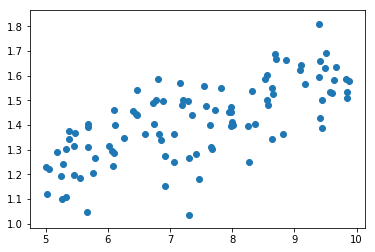

In [2]:
N = 100
original_m = m = np.random.normal(1,2)
original_b = b = np.random.normal(1,2)
X = np.random.uniform(5,10,N)
y = m * X + b + np.random.normal(0,0.1,N)

plt.scatter(X,y)
plt.show()

As we&rsquo;ve rigged it, these `N` data points are near the line `y = mx + b`.

Let&rsquo;s forget that we know about `m` and `b`, and try to **deduce** `m`
and `b` from the data `X` and `y`.



## The cost function



Given parameters `m` and `b`, the average of the squared errors can
serve as our cost function.



In [3]:
def cost(m,b):
    return np.mean( (y - (m * X + b)) ** 2 )

Note that even our chosen value of `m` and `b` doesn&rsquo;t make
`cost(m,b)` vanish, because there is some noise in the data `y`.



## Minimizing cost



In this case, we have **least squares** available to us to minimize the
cost function.



In [7]:
(best_m, best_b) = np.linalg.lstsq([[x,1] for x in X], y)[0]
print(cost(original_m,original_b))
print(cost(best_m,best_b))
goal = cost(best_m,best_b) + 0.001

0.012587510249181985
0.012498049872781745


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


## Stochastic gradient descent



If we are standing at $(m,b)$, we could likely reduce $Q$ by moving in
the direction of negative gradient.  So we subtract off the a small
multiple of the gradient of $Q$; this multiple is $\eta$, the
**learning rate**.  We let $\eta$ decay as we repeat this procedure of
**gradient descent**.

Note that `cost` has a special structure, namely it is the average $Q$
of cost functions $Q_i$ associated to the $i$th data point.  That is,
$Q(m,b)={\frac {1}{N}}\sum_{i=1}^{N}Q_{i}(m,b)$.  Often $N$ is very
large and computing $\nabla Q_i$ could be expensive, so we shuffle the
indices and only subtract off a few $\nabla Q_i$&rsquo;s.  This is
**stochastic** gradient descent.

For this example, let&rsquo;s just subtract one of the $Q_i$ by randomly
choosing an index with `np.random.randint(0,len(X))`.



In [5]:
def sgd_step(m,b,eta):
    i = np.random.randint(0,len(X))
    gradm = 2*X[i]*(m*X[i] + b - y[i])
    gradb = 2*(m*X[i] + b - y[i])
    return ( m - eta * gradm, b - eta * gradb )

We pick random values of `m` and `b`, and then repeat this `sgd_step`
until our `cost` function is small enough.  As we do so, the learning
rate decays.



In [13]:
def sgd():
    m, b = np.random.normal(size=2)
    t = 1
    while cost(m,b) > goal:
        eta = 0.01 * (0.99 ** (t / N))
        t = t + 1
        m, b = sgd_step(m, b, eta)
        print( cost(m,b) )
    return m, b

sgd()

1.566324378205274
1.8770522195675121
0.6340357348040574
1.2172681770433602
0.10801475011726039
0.11086426565562689
0.10802389697736156
0.31405432826893237
0.3696012492706876
0.22693479605834813
0.15450613466835048
0.11365393086948343
0.385832496201744
0.19592570841331944
0.4455533810950337
0.2949713319740056
0.33328953080159585
0.13826499223080604
0.24703935639627228
0.25708159207652587
0.10877844713854656
0.6975906174574971
0.1702500230147713
0.27525069722667966
0.44633284354092917
0.9587151281705963
0.1217355228720626
0.19659342274282637
0.21840653833976162
0.10261893273167226
0.13482685519482623
0.37844011870981853
0.2105155142804354
0.17035257450295094
0.2626008323072961
0.10678924892362922
0.22709967026696037
0.2815130652487608
0.16692227252312267
0.11836141674106938
0.1060593669672182
0.21238131098135124
0.21994932107984613
1.0394587795180366
0.10090803692704382
0.20993922416080435
0.11530767812421593
0.4369393711808653
0.18956836356040235
0.10417666082193679
0.14843413910063544


0.17439990167494712
0.1928301529318276
0.03932477493690452
0.13039830025462856
0.053855678519887665
0.03842574069067231
0.08870473941886836
0.03879650335933293
0.26664567054448285
0.08267809072478029
0.03827303640470086
0.04019943576804609
0.06985756480370293
0.11194355448283431
0.04454411944993883
0.04374352001614159
0.14056505090010107
0.03804052989086701
0.056734397658391035
0.04061381764638606
0.07838086751518071
0.040781990179692064
0.056442716208240234
0.14049079541245033
0.04887266115592839
0.039877659559935726
0.04567553848932288
0.04400849319203589
0.07552231782322762
0.06647742712919108
0.08280103863871949
0.04073424925853489
0.04214389412727627
0.03778349587936983
0.05607837351294071
0.10352752869066073
0.06088620348474067
0.03967825510790627
0.042643864330016566
0.12528532676359563
0.04228134713317621
0.05529513838848305
0.04013010067897478
0.10097829587223726
0.45814747317946514
0.12389651187410002
0.22256345060288862
0.05347329291194109
0.12908574648989143
0.0374863096606

0.02248570032121568
0.06452288830091361
0.022308146255063662
0.03601409648079434
0.05085220663106047
0.0680564890708082
0.1874467240458688
0.02564077540375411
0.023334834765024282
0.025550083149851088
0.10178023308875014
0.027985349879717486
0.05417560127049704
0.022098455275733123
0.022603722037750563
0.04204329805088238
0.04065744562703106
0.027334944811924503
0.03285066160067084
0.03334181639163967
0.07271408232473407
0.060477042549990354
0.028442785168476013
0.04692059646132593
0.022421541961324537
0.023673736135118056
0.027287189335902382
0.023430803217263273
0.05478691829152444
0.021955695240957543
0.026935918902221547
0.045152747974493916
0.02198590045609691
0.02683315333808808
0.0975734650893298
0.02193666298563245
0.026562567220389428
0.023364108070119353
0.05007990442991069
0.05655192448848512
0.02707163226072432
0.082116158768081
0.025276683219343205
0.02664377573791699
0.027973885304796067
0.05177179489680392
0.02350713202049423
0.03542583836582921
0.049151664672183036
0.02

0.07062286038191476
0.022116258406943975
0.01988889939526521
0.03244366577059505
0.054141762300094334
0.016657417110395742
0.03202704183371794
0.060413078437716525
0.017286139234620305
0.017252966245844742
0.016671537311414755
0.01944594847531397
0.027538562997688802
0.0548657936288627
0.02791366159066655
0.018592194772870017
0.03811544172493781
0.019543431862718313
0.022845756577471264
0.016689047292532268
0.04578494950533507
0.01848467523699801
0.03787852268910186
0.020216459289827418
0.030798006719237228
0.01824120420621393
0.05867122760533938
0.016971200299971848
0.019761658219744918
0.01644606861932975
0.08042147661831463
0.067315252784172
0.03507018531415553
0.01645894100492776
0.020638126786061063
0.023167091096737334
0.017174347022717383
0.04295695171689626
0.0179632663241722
0.059333001915953414
0.031450140570331436
0.07343027561529772
0.027990896337877588
0.03829126337356347
0.01705652714433695
0.01707777868138364
0.019660238174306597
0.0278755060005667
0.016896516534071385
0

0.01636203606822835
0.013950128013025887
0.03801601128523606
0.01772390578055898
0.022184026133326772
0.05730583907870404
0.016280362393890923
0.015606276844530113
0.023126140274986558
0.04166912086680826
0.05701726559515724
0.02575229373992315
0.0205604690137733
0.018090510656456088
0.03648828335196937
0.051308472294640944
0.021144399372581474
0.028005947953142183
0.015431408010215504
0.02488518784850489
0.013982724097182759
0.014053472133745493
0.01436105985710657
0.014429850346274945
0.014510222743367962
0.02598702318810545
0.013995995559916277
0.017249048115832537
0.04576128627528608
0.015987142471847668
0.017741950920474814
0.05089452064563105
0.0439528894002069
0.015123496220012012
0.015022691270166262
0.016170306473389188
0.018123813177994857
0.014524345911278895
0.022148849246364552
0.05032292540688365
0.014017294437574596
0.02469517882943766
0.04674473618605826
0.04815214687080846
0.01781821516998388
0.01398899123469473
0.023493293995006912
0.015034025587743829
0.0139756767517

(0.09639253234177247, 0.6921985698200239)